
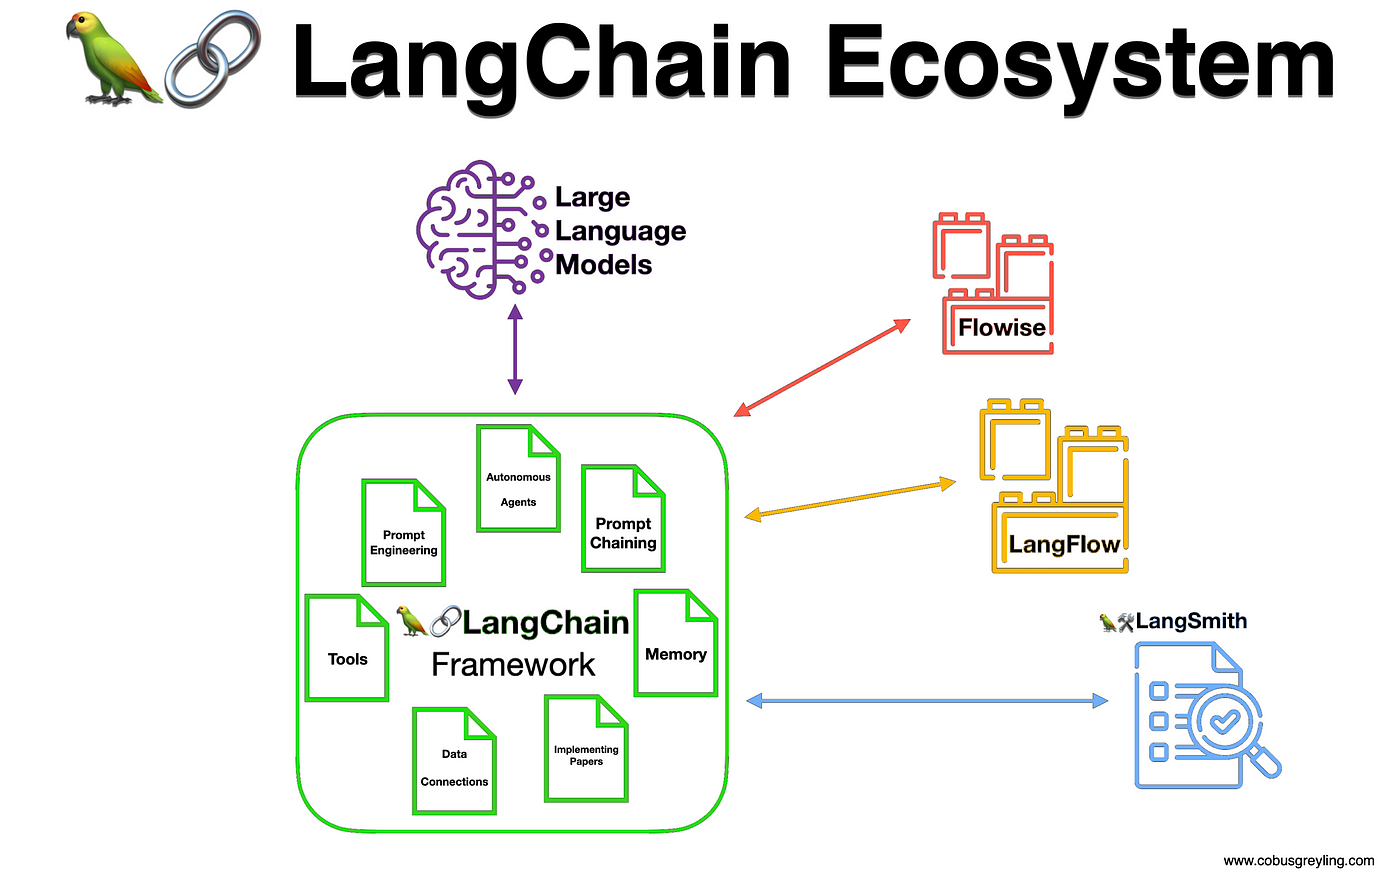

#### Passo 1: Instalar bibliotecas

In [32]:
#!pip install langchain
#!pip install -qU langchain-openai

#### Passo 2: Importar bibliotecas

In [33]:
import os
import langchain_openai

#### Passo 3: Criar a chave da API

In [35]:
os.environ["OPENAI_API_KEY"] = "copie sua chave aqui"

#### Passo 4: Definir modelo

In [36]:
model = ChatOpenAI(model="gpt-4")

#### Passo 5: Definir mensagens

In [37]:
messages = [
    SystemMessage(content="Translate the following from English into Italian"),
    HumanMessage(content="How is class today?"),
]

#### Passo 6: Submeter mensagem ao modelo

In [38]:
model.invoke(messages)

AIMessage(content='Come è la lezione oggi?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7e10eb05-3d9b-470f-9198-35bef10fab5d-0', usage_metadata={'input_tokens': 23, 'output_tokens': 7, 'total_tokens': 30})

#### Passo 7: Limpar dados de saída

In [43]:
# Analisador de saída
parser = StrOutputParser()
# Armazena a saída do modelo
result = model.invoke(messages)
# Extrai apenas o texto
parser.invoke(result)

'Come è la lezione oggi?'

#### Passo 8: Criar cadeia com LangChain

In [44]:
chain = model | parser

In [45]:
chain.invoke(messages)

'Come è la lezione oggi?'

#### Passo 9: Criar um Template

In [52]:
system_template = "Translate the following into {language}:"

In [53]:
prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
)

In [54]:
result = prompt_template.invoke({"language": "italian", "text": "hi"})
result

ChatPromptValue(messages=[SystemMessage(content='Translate the following into italian:'), HumanMessage(content='hi')])

In [55]:
result.to_messages()

[SystemMessage(content='Translate the following into italian:'),
 HumanMessage(content='hi')]

#### Passo 10: Encadeando componentes com operador pipe

In [56]:
chain = prompt_template | model | parser

In [59]:
chain.invoke({"language": "Francês", "text": "How is class today?"})

"Comment se passe la classe aujourd'hui?"